In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

sns.set_theme()

In [84]:
def draw_forecast(train, test, forecast, title):
    plt.figure(figsize=(14, 4)) 
    plt.plot(train, label="Train") 
    plt.plot(test, label="Test", color="green") 
    plt.plot(forecast, label="Forecast", color="orange") 
    plt.title(title) 
    plt.legend() 
    plt.show()

In [111]:
def get_metrics(model, test, forecast):

    return {
        model : {
            'MAE': round(mean_absolute_error(test, forecast), 4),
            'MSE': round(mean_squared_error(test, forecast), 4),
            'RMSE': round(np.sqrt(mean_squared_error(test, forecast)), 4),
            'MAPE': round(mean_absolute_percentage_error(test, forecast), 4)
        }
    }

## Урок

In [71]:
df = pd.read_csv(
    '../data/06-2-data.csv', 
    names=['Date', 'Value'], 
    parse_dates=['Date'], 
    index_col='Date',
    header=0
)

df = df.asfreq(freq='D')

In [72]:
# Разделяем временной ряд на тренировочную и тестовую части 
# Берём всё, кроме последних 30 точек — для обучения 
train = df['Value'][:-30]
test = df['Value'][-30:]

### Simple Exponential Smoothing

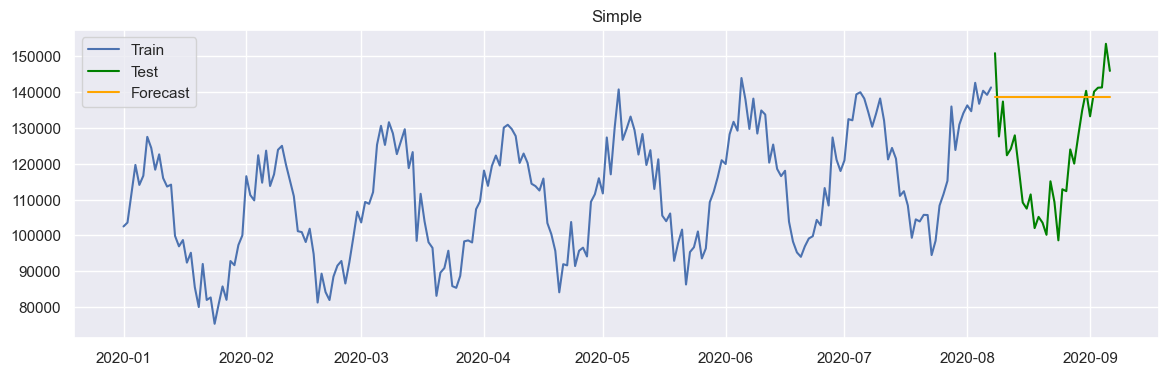

In [85]:
# Обучаем модель  
alpha=0.3 
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.3, optimized=False) 

# Прогнозируем 30 следующих значений после обучающего периода 
ses_forecast = ses_model.forecast(30) 

# Визуализация
draw_forecast(train, test, ses_forecast, title='Simple')

### Double Exponential Smoothing

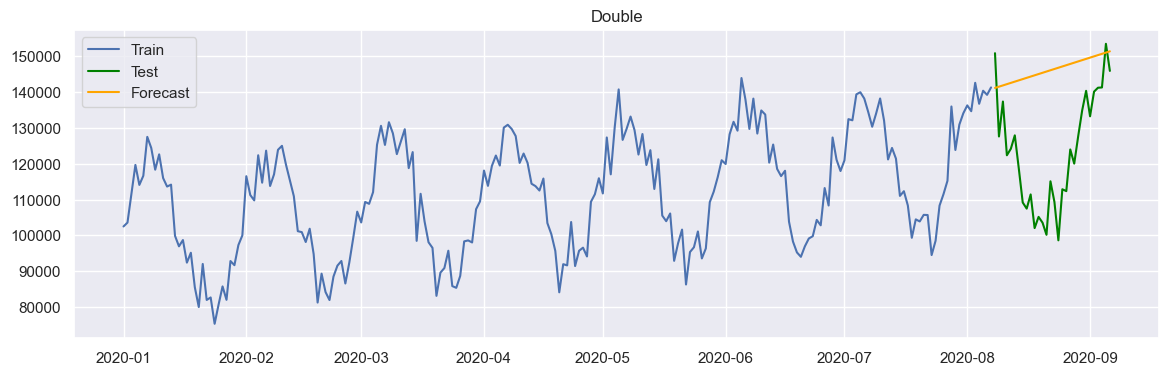

In [86]:
# Обучаем модель
holt_model = ExponentialSmoothing(train, trend="add").fit() 

# Прогнозируем 30 следующих значений после обучающего периода 
holt_forecast = holt_model.forecast(30) 

# Визуализация
draw_forecast(train, test, holt_forecast, title='Double')

### Triple Exponential Smoothing

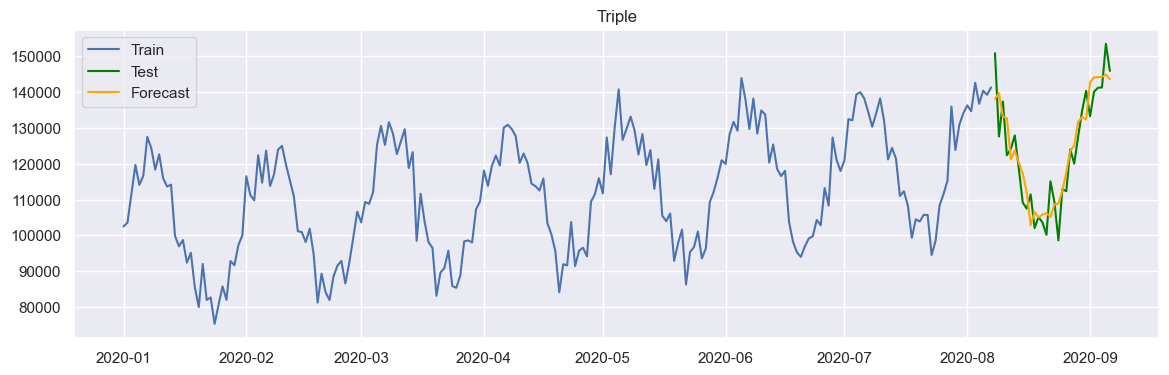

In [87]:
# Обучаем модель тройного экспоненциального сглаживания (Holt-Winters) с аддитивным трендом и сезонностью
# seasonal_periods=30 — длина сезонного цикла (например, месяц, если данные дневные)
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=30).fit()

# Прогнозируем 30 следующих значений после обучающего периода
hw_forecast = hw_model.forecast(30)

# Визуализация
draw_forecast(train, test, hw_forecast, title='Triple')

## Задача 10

- Загрузите данные из файла. Преобразуйте колонку date в индекс с типом datetime и установите частоту D (дневную). Постройте график временного ряда.

In [93]:
df = pd.read_csv(
    '../data/06-3-data.csv', 
    names=['Date', 'Value'], 
    parse_dates=['Date'], 
    index_col='Date',
    header=0
)

df = df.asfreq(freq='D')

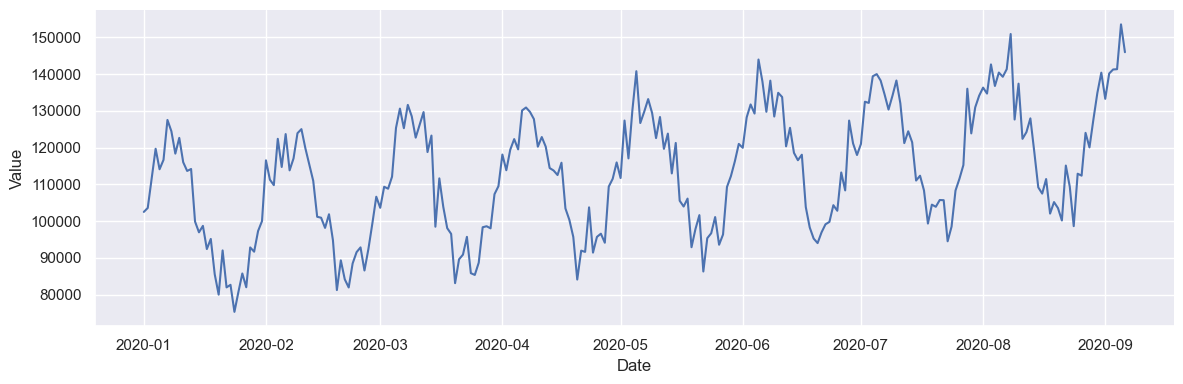

In [94]:
g = sns.relplot(x=df.index, y=df['Value'], kind='line', aspect=3, height=4)

- Реализуйте простое экспоненциальное сглаживание с параметром alpha=0.6 без оптимизации. 
- Используйте первые все, кроме последних 40 точек как обучающую выборку.
- Постройте прогноз на 40 шагов вперёд и визуализируйте: обучающую часть, тестовую часть прогноз.

In [142]:
train = df['Value'][:-40]
test = df['Value'][-40:]
metrics = []

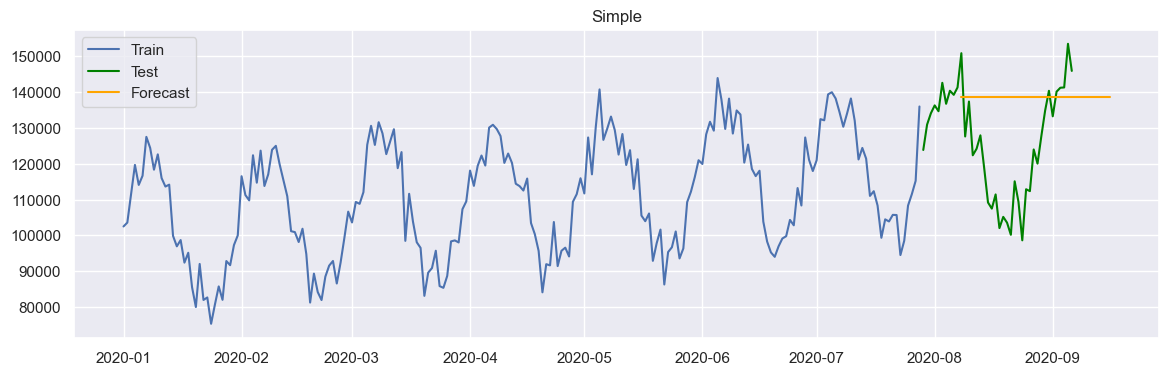

In [143]:
# Прогнозируем
ses_forecast = ses_model.forecast(40) 
metrics.append(get_metrics(model='Simple', test=test, forecast=ses_forecast))

# Визуализация
draw_forecast(train, test, ses_forecast, title='Simple')

- Теперь используйте модель Holt (двойное экспоненциальное сглаживание) с аддитивным трендом для тех же обучающих и тестовых данных.
- Спрогнозируйте 40 шагов вперёд. Постройте график с обучающей частью, тестовой частью, прогнозом модели Holt

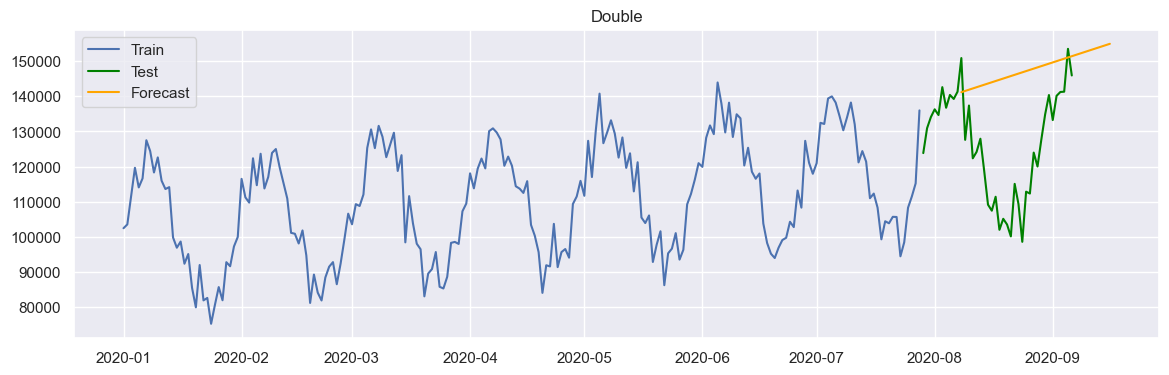

In [144]:
# Прогнозируем
holt_forecast = holt_model.forecast(40) 
metrics.append(get_metrics(model='Double', test=test, forecast=holt_forecast))

# Визуализация
draw_forecast(train, test, holt_forecast, title='Double')

- Теперь примените Holt-Winters модель с аддитивным трендом, аддитивной сезонностью, параметром seasonal_periods=30
- Спрогнозируйте 40 точек вперёд и постройте график, аналогичный предыдущим.

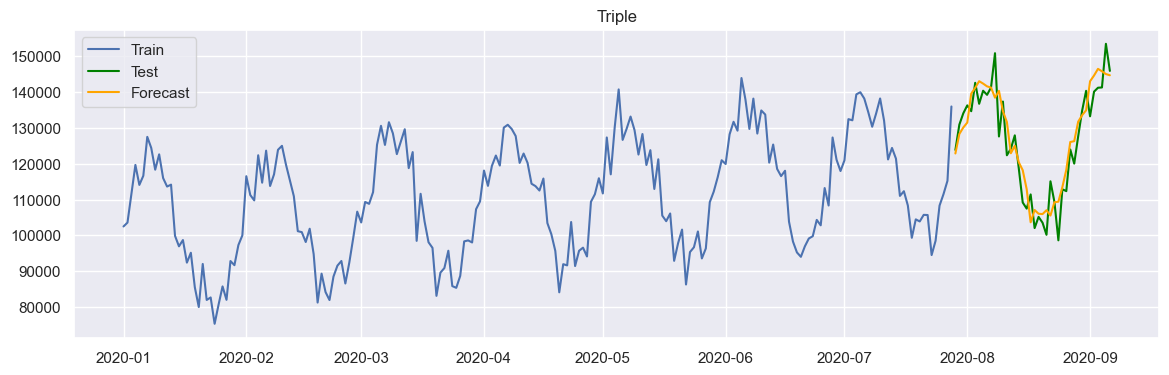

In [ ]:
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=30).fit()

# Прогнозируем 
hw_forecast = hw_model.forecast(40)
metrics.append(get_metrics(model='Triple', test=test, forecast=hw_forecast))

# Визуализация
draw_forecast(train, test, hw_forecast, title='Triple')

- Для каждой из моделей (SES, Holt, Holt-Winters), рассчитайте MAE (среднюю абсолютную ошибку) между прогнозом и реальными значениями из тестовой выборки.
- Какая модель показала наименьшую среднюю абсолютную ошибку (MAE) на тестовой выборке?

In [147]:
metrics

[{'Simple': {'MAE': 14751.0573,
   'MSE': 367973531.6904,
   'RMSE': np.float64(19182.6362),
   'MAPE': 0.1297}},
 {'Double': {'MAE': 21898.9781,
   'MSE': 709164525.1958,
   'RMSE': np.float64(26630.1432),
   'MAPE': 0.1902}},
 {'Triple': {'MAE': 4744.3125,
   'MSE': 34233032.5257,
   'RMSE': np.float64(5850.9001),
   'MAPE': 0.0383}}]

In [152]:
merged = {k: v for d in metrics for k, v in d.items()}
metrics_df = pd.DataFrame(merged).T 
metrics_df

,MAE,MSE,RMSE,MAPE
Simple,14751.0573,3.679735e+08,19182.6362,0.1297
Double,21898.9781,7.091645e+08,26630.1432,0.1902
Triple,4744.3125,3.423303e+07,5850.9001,0.0383
